In [ ]:
import pandas as pd

df = pd.read_csv('/content/creditcard.csv')
df.shape





(284807, 31)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
# print(df['is_fraud'].dtypes)
# df['is_fraud'] = df['is_fraud'].astype(int)
# print(df['is_fraud'].dtypes)
# df.info()
# df1.isna().sum()

In [ ]:
# df[df.isna().any(axis=1)]
# # df = df.drop(122880)
# df[df.isna().any(axis=1)]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class


In [ ]:
fradulent_amount = df[df['Class']==1]['Amount'].sum()
normal_amount = df[df['Class']==0]['Amount'].sum()
total_amount = df["Amount"].sum()
print("Fradulent transaction amount",fradulent_amount)
print("Normal transaction amount",normal_amount)
print("Total amount of transaction",total_amount)
print("Percentage lost due to fradulent transaction",(fradulent_amount*100)/total_amount)

Fradulent transaction amount 60127.97
Normal transaction amount 25102462.04
Total amount of transaction 25162590.009999998
Percentage lost due to fradulent transaction 0.2389577939953885


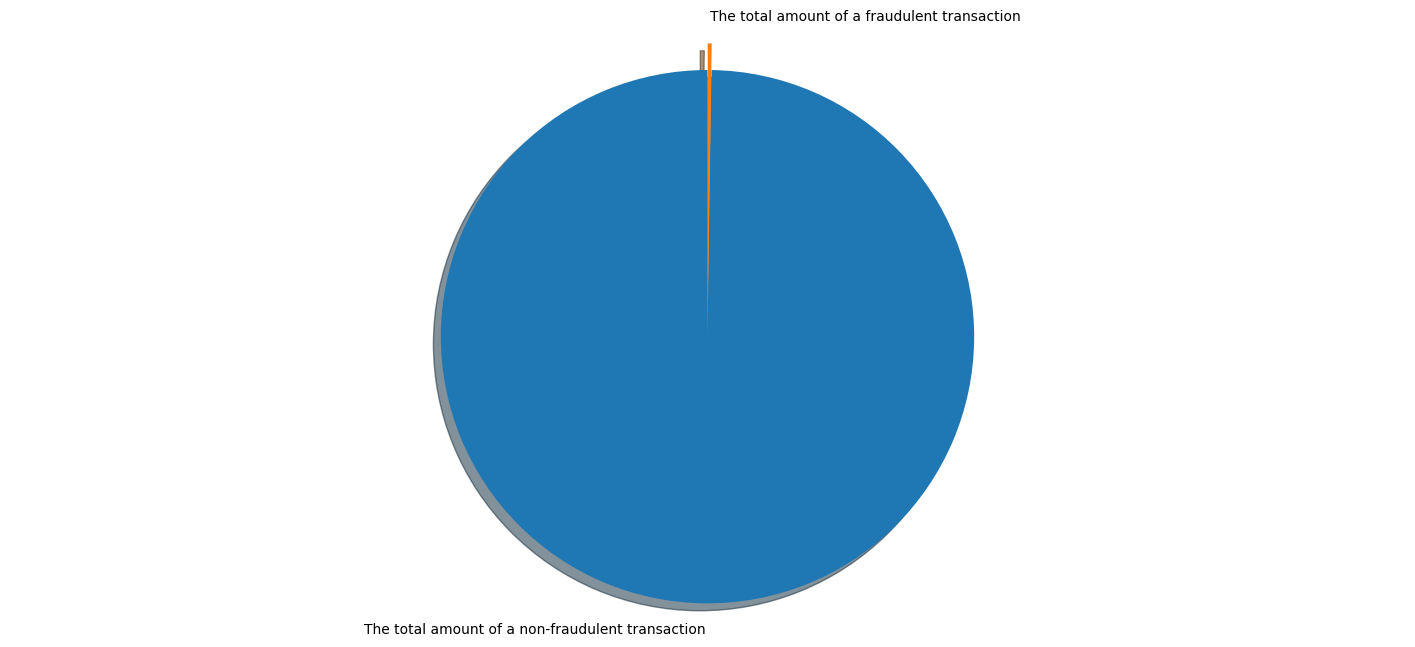

In [ ]:
import statistics
import matplotlib.pyplot as plt
# fraudulent_mean = statistics.mean(df1[df1['is_fraud']==1]['amt'])
# nonfraudulent_mean = statistics.mean(df1[df1['is_fraud']==0]['amt'])
d = {'Class':[0, 1], 'Mean':[normal_amount, fradulent_amount]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The total amount of a non-fraudulent transaction', 'The total amount of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
total_transaction = len(df)
normal_transaction = len(df[df["Class"] == 0])
fraudulent_transaction = len(df[df["Class"] == 1])
normal_percentage = (normal_transaction/(normal_transaction+fraudulent_transaction))*100
fraud_percentage = (fraudulent_transaction/(normal_transaction+fraudulent_transaction))*100
print('Total number of Trnsactions are {}'.format(total_transaction))
print('Number of Normal Transactions are {}'.format(normal_transaction))
print('Number of fraudulent Transactions are {}'.format(fraudulent_transaction))
print('Percentage of normal Transactions is {}'.format(normal_percentage))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of normal Transactions is 99.82725143693798
Percentage of fraud Transactions is 0.1727485630620034


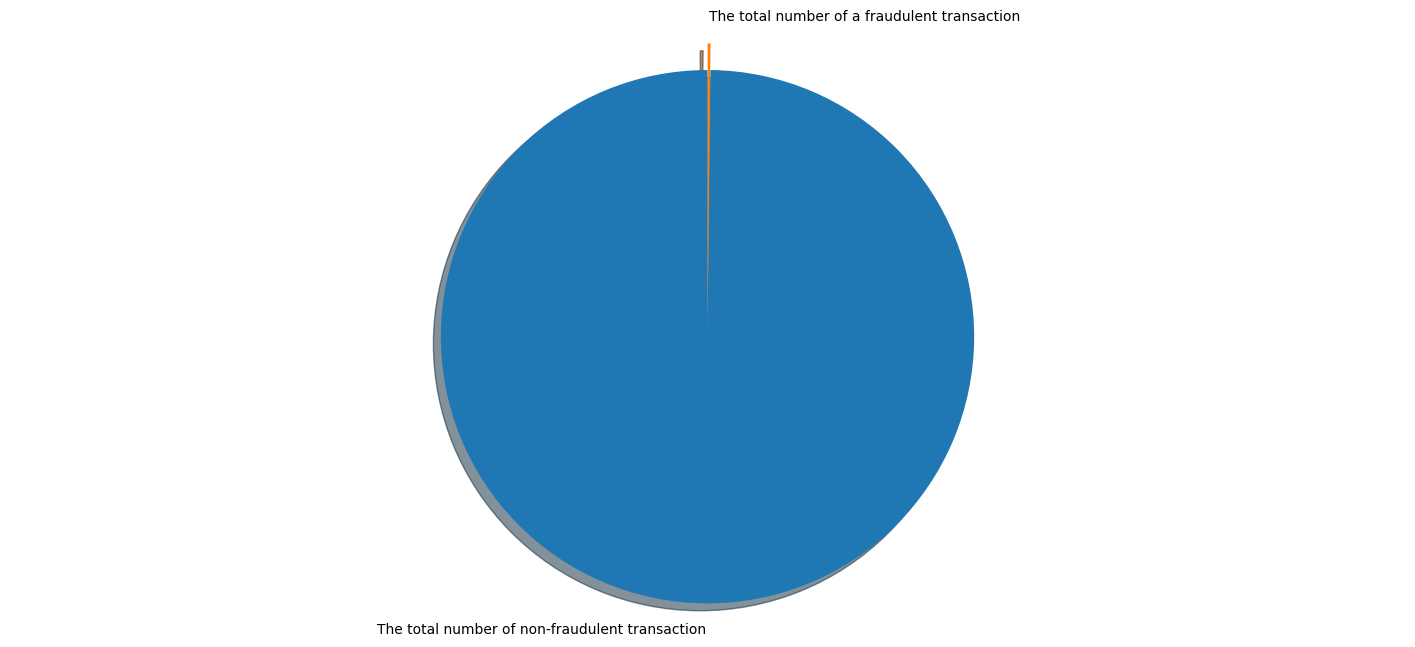

In [ ]:
# fraudulent_transaction_mean = statistics.mean(df1[df1['is_fraud']==1]['is_fraud'])
# normal_transaction_mean = statistics.mean(df1[df1['is_fraud']==0]['is_fraud'])
d = {'Class':[0, 1], 'Mean':[normal_transaction, fraudulent_transaction]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The total number of non-fraudulent transaction', 'The total number of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# corr_matrix=df.corr()
# # sns.heatmap(corr_matrix)
# plt.figure(1, figsize=(15,15))
# sns.heatmap(corr_matrix,annot=True,cbar=False,linewidths=0.5, linecolor='red',cmap="plasma")

In [ ]:
# df['Class'].value_counts()
# sns.countplot("Class",data=df)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

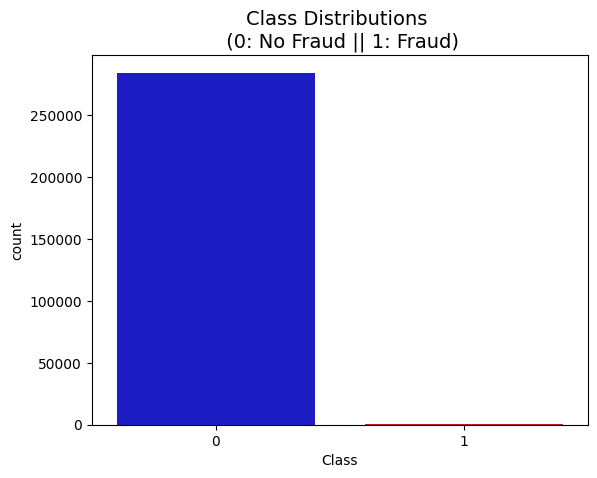

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

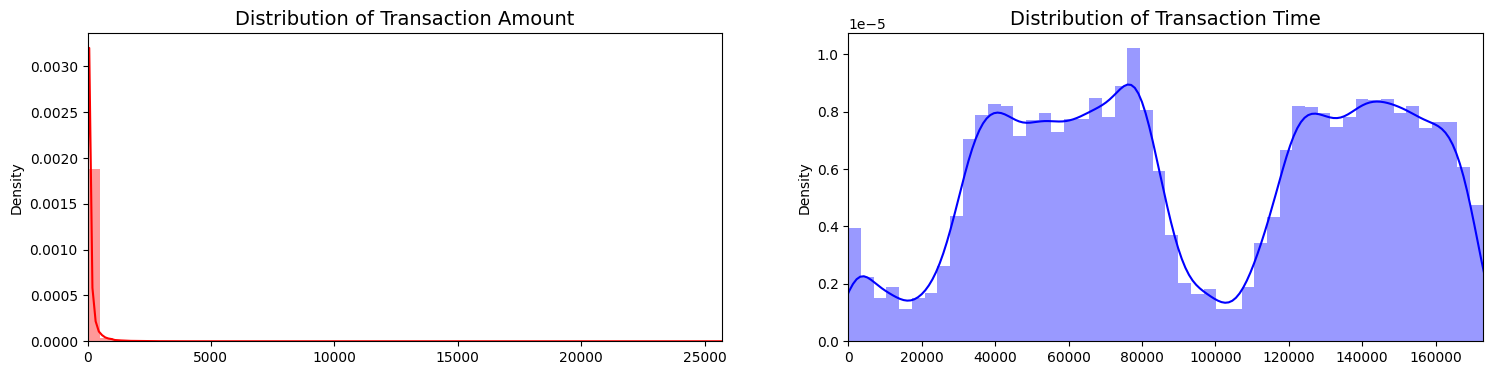

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


scaled_amount    1.783274
scaled_time     -0.994983
V1              -1.359807
V2              -0.072781
V3               2.536347
V4               1.378155
V5              -0.338321
V6               0.462388
V7               0.239599
V8               0.098698
V9               0.363787
V10              0.090794
V11             -0.551600
V12             -0.617801
V13             -0.991390
V14             -0.311169
V15              1.468177
V16             -0.470401
V17              0.207971
V18              0.025791
V19              0.403993
V20              0.251412
V21             -0.018307
V22              0.277838
V23             -0.110474
V24              0.066928
V25              0.128539
V26             -0.189115
V27              0.133558
V28             -0.021053
Name: 0, dtype: float64

--- 12.146808862686157 seconds ---


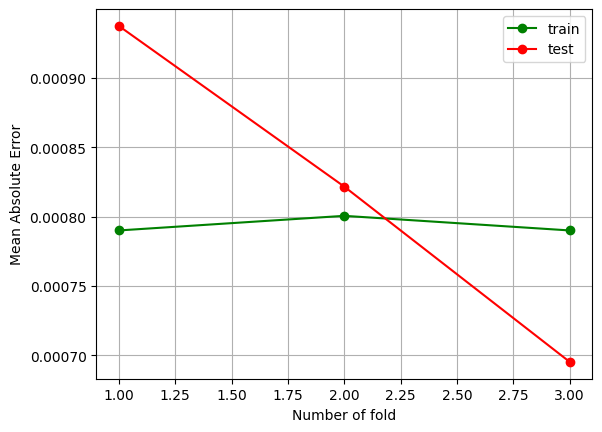

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of Logistic Regression is: ",np.mean(accuracy))
print("Precision of Logistic Regression is: ",np.mean(precision))
print("Recall of Logistic Regression is: ",np.mean(recall))
print("Specificity of Logistic Regression is: ",np.mean(specificity))
print("F1 score of Logistic Regression is: ",np.mean(f1))
print("False Positive Rate of Logistic Regression is: ",1-np.mean(specificity))
print("The AUC score of Logistic Regression is: ",np.mean(roc_auc))
print("The MCC score of Logistic Regression is: ",np.mean(mcc))
print("The G-Mean of Logistic Regression is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of Logistic Regression is:  0.9991819025616819
Precision of Logistic Regression is:  0.8700152779269762
Recall of Logistic Regression is:  0.6178861788617888
Specificity of Logistic Regression is:  0.9998417248845493
F1 score of Logistic Regression is:  0.7218096934663927
False Positive Rate of Logistic Regression is:  0.00015827511545074557
The AUC score of Logistic Regression is:  0.808863951873169
The MCC score of Logistic Regression is:  0.7324135184401909
The G-Mean of Logistic Regression is:  0.7852908833253925
Array from ROC is [[0.00000000e+00 1.58275115e-04 1.00000000e+00]
 [0.00000000e+00 6.17886179e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 863.7474513053894 seconds ---


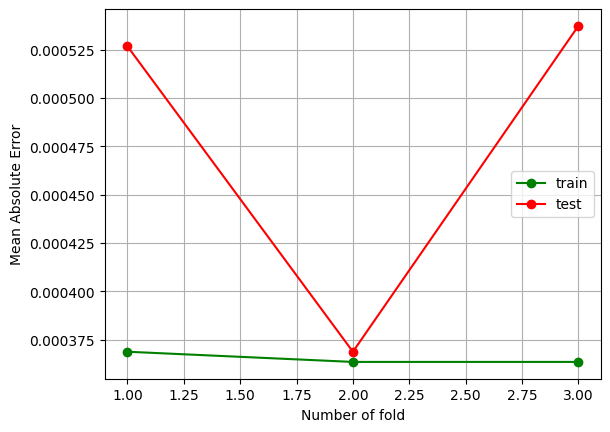

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of KNearestNeighbour is: ",np.mean(accuracy))
print("Precision of KNearestNeighbour is: ",np.mean(precision))
print("Recall of KNearestNeighbour is: ",np.mean(recall))
print("Specificity of KNearestNeighbour is: ",np.mean(specificity))
print("F1 score of KNearestNeighbourn is: ",np.mean(f1))
print("False Positive Rate of KNearestNeighbour is: ",1-np.mean(specificity))
print("The AUC score of KNearestNeighbour is: ",np.mean(roc_auc))
print("The MCC score of KNearestNeighbour is: ",np.mean(mcc))
print("The G-Mean of KNearestNeighbour is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of KNearestNeighbour is:  0.999522483437229
Precision of KNearestNeighbour is:  0.9324320253941774
Recall of KNearestNeighbour is:  0.7804878048780489
Specificity of KNearestNeighbour is:  0.9999015175467693
F1 score of KNearestNeighbourn is:  0.8496877994074188
False Positive Rate of KNearestNeighbour is:  9.848245323074156e-05
The AUC score of KNearestNeighbour is:  0.890194661212409
The MCC score of KNearestNeighbour is:  0.8528395047982045
The G-Mean of KNearestNeighbour is:  0.8833554248907208
Array from ROC is [[0.00000000e+00 9.84824532e-05 1.00000000e+00]
 [0.00000000e+00 7.80487805e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 255.73843026161194 seconds ---


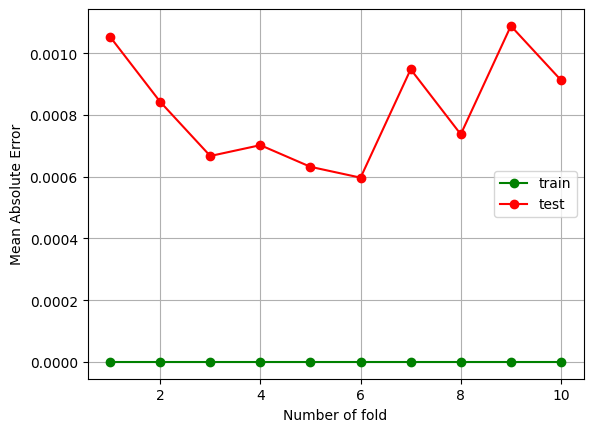

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of DecisionTree is: ",np.mean(accuracy))
print("Precision of DecisionTree is: ",np.mean(precision))
print("Recall of DecisionTree is: ",np.mean(recall))
print("Specificity of DecisionTree is: ",np.mean(specificity))
print("F1 score of DecisionTree is: ",np.mean(f1))
print("False Positive Rate of DecisionTree is: ",1-np.mean(specificity))
print("The AUC score of DecisionTree is: ",np.mean(roc_auc))
print("The MCC score of DecisionTree is: ",np.mean(mcc))
print("The G-Mean of DecisionTree is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of DecisionTree is:  0.9991819011314067
Precision of DecisionTree is:  0.7617222451518564
Recall of DecisionTree is:  0.7702857142857142
Specificity of DecisionTree is:  0.9995779321841246
F1 score of DecisionTree is:  0.76531709984474
False Positive Rate of DecisionTree is:  0.0004220678158753932
The AUC score of DecisionTree is:  0.8849318232349195
The MCC score of DecisionTree is:  0.7652519915191098
The G-Mean of DecisionTree is:  0.8771393548210893
Array from ROC is [[0.00000000e+00 4.22067816e-04 1.00000000e+00]
 [0.00000000e+00 7.70285714e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 2.42268443107605 seconds ---


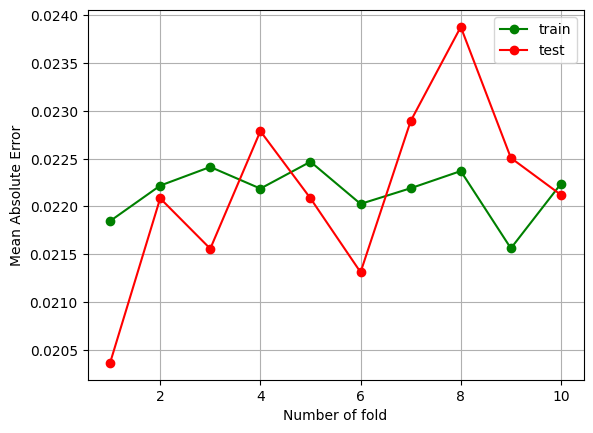

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from sklearn.naive_bayes import GaussianNB
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = GaussianNB()
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of GaussianNB is: ",np.mean(accuracy))
print("Precision of GaussianNB is: ",np.mean(precision))
print("Recall of GaussianNB is: ",np.mean(recall))
print("Specificity of GaussianNB is: ",np.mean(specificity))
print("F1 score of GaussianNB is: ",np.mean(f1))
print("False Positive Rate of GaussianNB is: ",1-np.mean(specificity))
print("The AUC score of GaussianNB is: ",np.mean(roc_auc))
print("The MCC score of GaussianNB is: ",np.mean(mcc))
print("The G-Mean of GaussianNB is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of GaussianNB is:  0.9778411274034848
Precision of GaussianNB is:  0.061613939835050355
Recall of GaussianNB is:  0.8293877551020408
Specificity of GaussianNB is:  0.9780982297335805
F1 score of GaussianNB is:  0.11469541109994044
False Positive Rate of GaussianNB is:  0.021901770266419485
The AUC score of GaussianNB is:  0.9037429924178106
The MCC score of GaussianNB is:  0.22246525700887437
The G-Mean of GaussianNB is:  0.9004971304343314
Array from ROC is [[0.         0.02190177 1.        ]
 [0.         0.82938776 1.        ]
 [2.         1.         0.        ]]


--- 1805.6795420646667 seconds ---


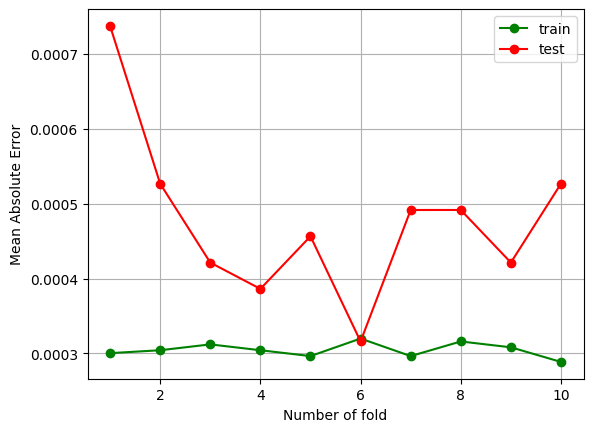

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from xgboost import XGBClassifier
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of XGBClassifier is: ",np.mean(accuracy))
print("Precision of XGBClassifier is: ",np.mean(precision))
print("Recall of XGBClassifier is: ",np.mean(recall))
print("Specificity of XGBClassifier is: ",np.mean(specificity))
print("F1 score of XGBClassifier is: ",np.mean(f1))
print("False Positive Rate of XGBClassifier is: ",1-np.mean(specificity))
print("The AUC score of XGBClassifier is: ",np.mean(roc_auc))
print("The MCC score of XGBClassifier is: ",np.mean(mcc))
print("The G-Mean of XGBClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of XGBClassifier is:  0.9995224836220402
Precision of XGBClassifier is:  0.9247008343959564
Recall of XGBClassifier is:  0.7905306122448981
Specificity of XGBClassifier is:  0.9998839318640256
F1 score of XGBClassifier is:  0.8512411845801239
False Positive Rate of XGBClassifier is:  0.00011606813597442311
The AUC score of XGBClassifier is:  0.8952072720544617
The MCC score of XGBClassifier is:  0.8541898372363226
The G-Mean of XGBClassifier is:  0.8888216288947437
Array from ROC is [[0.00000000e+00 1.16068136e-04 1.00000000e+00]
 [0.00000000e+00 7.90530612e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 1609.5960247516632 seconds ---


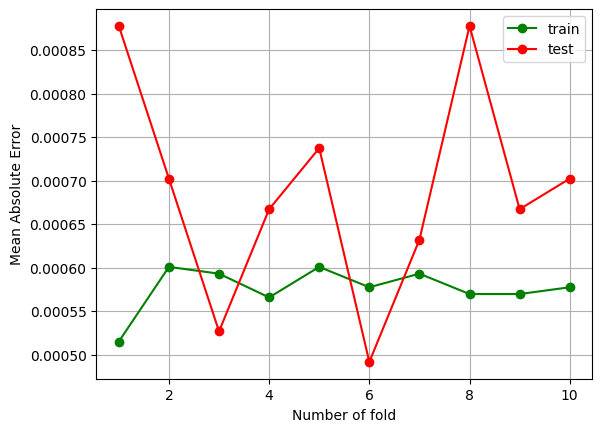

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import AdaBoostClassifier
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = AdaBoostClassifier(n_estimators=100, random_state=9)
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of AdaBoostClassifier is: ",np.mean(accuracy))
print("Precision of AdaBoostClassifier is: ",np.mean(precision))
print("Recall of AdaBoostClassifier is: ",np.mean(recall))
print("Specificity of AdaBoostClassifier is: ",np.mean(specificity))
print("F1 score of AdaBoostClassifier is: ",np.mean(f1))
print("False Positive Rate of AdaBoostClassifier is: ",1-np.mean(specificity))
print("The AUC score of AdaBoostClassifier is: ",np.mean(roc_auc))
print("The MCC score of AdaBoostClassifier is: ",np.mean(mcc))
print("The G-Mean of AdaBoostClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of AdaBoostClassifier is:  0.9993118140262244
Precision of AdaBoostClassifier is:  0.8504053834028955
Recall of AdaBoostClassifier is:  0.7316326530612246
Specificity of AdaBoostClassifier is:  0.999774897808152
F1 score of AdaBoostClassifier is:  0.7857071543219004
False Positive Rate of AdaBoostClassifier is:  0.0002251021918480145
The AUC score of AdaBoostClassifier is:  0.8657037754346882
The MCC score of AdaBoostClassifier is:  0.7880213927286823
The G-Mean of AdaBoostClassifier is:  0.8548487954861883
Array from ROC is [[0.00000000e+00 2.25102192e-04 1.00000000e+00]
 [0.00000000e+00 7.31632653e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 1043.8029057979584 seconds ---


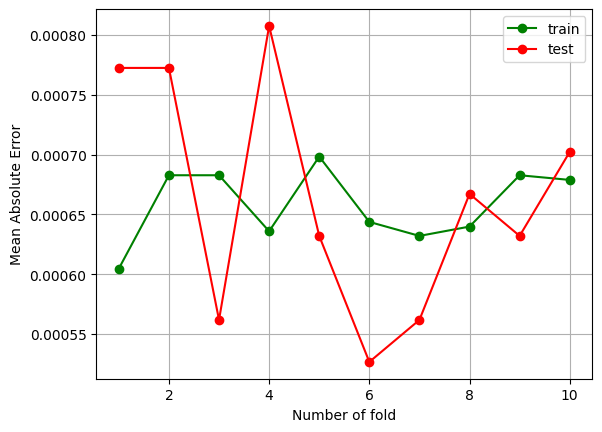

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from sklearn.svm import LinearSVC
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearSVC()
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of LinearSVC is: ",np.mean(accuracy))
print("Precision of LinearSVC is: ",np.mean(precision))
print("Recall of LinearSVC is: ",np.mean(recall))
print("Specificity of LinearSVC is: ",np.mean(specificity))
print("F1 score of LinearSVC is: ",np.mean(f1))
print("False Positive Rate of LinearSVC is: ",1-np.mean(specificity))
print("The AUC score of LinearSVC is: ",np.mean(roc_auc))
print("The MCC score of LinearSVC is: ",np.mean(mcc))
print("The G-Mean of LinearSVC is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of LinearSVC is:  0.9993363926779099
Precision of LinearSVC is:  0.8746488934947619
Recall of LinearSVC is:  0.7214693877551019
Specificity of LinearSVC is:  0.9998171048866406
F1 score of LinearSVC is:  0.7891823315849403
False Positive Rate of LinearSVC is:  0.0001828951133594492
The AUC score of LinearSVC is:  0.8606432463208712
The MCC score of LinearSVC is:  0.7932814537647875
The G-Mean of LinearSVC is:  0.84884746585271
Array from ROC is [[0.00000000e+00 1.82895113e-04 1.00000000e+00]
 [0.00000000e+00 7.21469388e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


--- 1672.2263782024384 seconds ---


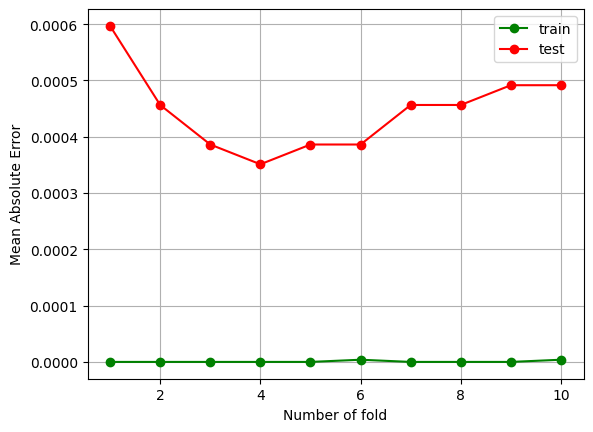

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(n_estimators=100, max_features=3)
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of RandomForestClassifier is: ",np.mean(accuracy))
print("Precision of RandomForestClassifier is: ",np.mean(precision))
print("Recall of RandomForestClassifier is: ",np.mean(recall))
print("Specificity of RandomForestClassifier is: ",np.mean(specificity))
print("F1 score of RandomForestClassifier is: ",np.mean(f1))
print("False Positive Rate of RandomForestClassifier is: ",1-np.mean(specificity))
print("The AUC score of RandomForestClassifier is: ",np.mean(roc_auc))
print("The MCC score of RandomForestClassifier is: ",np.mean(mcc))
print("The G-Mean of RandomForestClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of RandomForestClassifier is:  0.9995540836360848
Precision of RandomForestClassifier is:  0.9591332822077367
Recall of RandomForestClassifier is:  0.7764081632653062
Specificity of RandomForestClassifier is:  0.9999402071027157
F1 score of RandomForestClassifier is:  0.8574903874635641
False Positive Rate of RandomForestClassifier is:  5.979289728430537e-05
The AUC score of RandomForestClassifier is:  0.8881741851840108
The MCC score of RandomForestClassifier is:  0.8624053807981008
The G-Mean of RandomForestClassifier is:  0.8809929559713783
Array from ROC is [[0.00000000e+00 5.97928973e-05 1.00000000e+00]
 [0.00000000e+00 7.76408163e-01 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    # best_est = rand_log_reg.best_estimator_
    prediction = log_reg_sm.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9420229078366102
precision: 0.06100995266888799
recall: 0.9137293086660175
f1: 0.11258177254614361
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# SMOTE ENN
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    # best_est = rand_log_reg.best_estimator_
    prediction = log_reg_sm.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

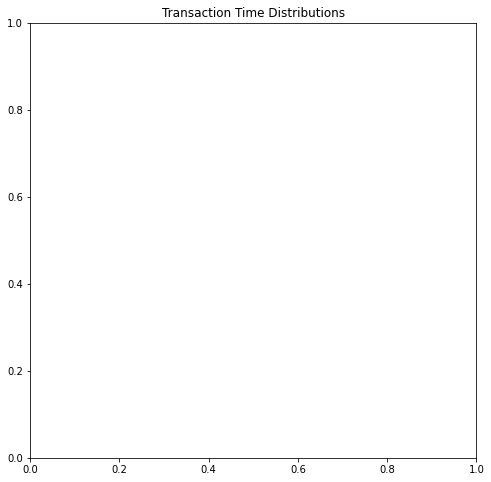

In [ ]:
# plt.figure(figsize=(8,8))
# plt.title('Transaction Time Distributions')
# sns.distplot(df1['trans_date_trans_time'])
# plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X = df.drop(['Class'],axis=1)
y = df['Class']
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=3)
sfs.get_support()
sfs.transform(X).shape

(284807, 3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1300)
rfr.fit(X,y)
importance = rfr.frature_importances_
importance_df = pd.DataFrame({"Features":X.columns,"Importance":importance})
importance_df = importance_df.sort_values("Importance")
plt.bar(importance_df["Features"],importance_df["Importance"])
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# XGBOOST CLASSIFIER
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), X, y)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
# k nearest neighbour classifier using k fold validaion to prevent overfitting
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop(['Class'],axis=1)
y = df['Class']
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=3)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

KeyboardInterrupt: ignored

In [ ]:
# k neaarest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Model = KNeighborsClassifier(n_neighbors=3)
Model.fit(X_train, y_train)

y_train_pred = Model.predict(X_train)
y_test_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
# Accuracy score

print('accuracy on training data is',accuracy_score(y_train_pred,y_train))
print('accuracy is',accuracy_score(y_test_pred,y_test))


# X = df.drop(['Class'],axis=1)
# y = df['Class']
# kf = KFold(n_splits=4)
# mae_train = []
# mae_test = []
# X_train, X_test = X.iloc[train_index], X.iloc[test_index]
# y_train, y_test = y[train_index], y[test_index]
# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(X_train, y_train)
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)
mean_absolute_error(y_train, y_train_pred)
mean_absolute_error(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.12      0.21       136

    accuracy                           1.00     85443
   macro avg       1.00      0.56      0.60     85443
weighted avg       1.00      1.00      1.00     85443

[[85307     0]
 [  120    16]]
accuracy is 0.9985955549313578


0.0014044450686422527

In [ ]:
mean_absolute_error(y_train, y_train_pred)
mean_absolute_error(y_test, y_test_pred)

0.0014044450686422527

In [ ]:
## XGBoost

Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

[[85301    24]
 [    6   112]]
accuracy is  0.9996488887328394


In [ ]:
# SAMPLING TECHNIQUES




from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# print(sss)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

df2 = pd.DataFrame(original_Xtrain)
df3 = pd.DataFrame(original_ytrain)
df_new = pd.concat([df2, df3], axis=1)
df4 = pd.DataFrame(df_new)
df4
# print(original_Xtrain)


# Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# print(original_Xtrain)
# print(original_ytrain)

from sklearn.utils import resample
df_minority_upsampled = resample(df4[df4.Class==1],
                                 replace=True,     # sample with replacement
                                 n_samples=len(df4[df4.Class==0]),    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df4[df4.Class==0], df_minority_upsampled])
df_upsampled
df_up=df_upsampled.sample(frac=1)
df_up['Class'].value_counts()



# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_up = df_up.drop('Class', axis=1)
Y_up = df_up['Class']



from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_up,Y_up)
y_pred = logistic_model.predict(original_Xtest)

acc = accuracy_score(original_ytest, y_pred)
prec = precision_score(original_ytest, y_pred)
recall = recall_score(original_ytest, y_pred)
f1 = f1_score(original_ytest, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(original_ytest, y_pred, target_names=target_names))
# cf_matrix=confusion_matrix(y_pred,original_ytest)
# cf_matrix







df_majority_downsampled = resample(df4[df4.Class==0],
                                 replace=True,    # sample without replacement
                                 n_samples=len(df4[df4.Class==1]),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df4[df4.Class==1]])
df_down=df_downsampled.sample(frac=1)
df_down['Class'].value_counts()

# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_down = df_down.drop('Class', axis=1)
Y_down= df_down['Class']

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_down, Y_down)
y_pred = logistic_model.predict(original_Xtest)

acc = accuracy_score(original_ytest, y_pred)
prec = precision_score(original_ytest, y_pred)
recall = recall_score(original_ytest, y_pred)
f1 = f1_score(original_ytest, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(original_ytest, y_pred, target_names=target_names))
# cf_matrix=confusion_matrix(y_pred, Y_test)
# cf_matrix


# SMOTE
Xtrain_smote = original_Xtrain
ytrain_smote = original_ytrain
Xtrain_smote.shape,ytrain_smote.shape

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(Xtrain_smote, ytrain_smote.ravel())
X_train_res.shape, y_train_res.shape
len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train_res, y_train_res)
y_pred = logistic_model.predict(original_Xtest)

acc = accuracy_score(original_ytest, y_pred)
prec = precision_score(original_ytest, y_pred)
recall = recall_score(original_ytest, y_pred)
f1 = f1_score(original_ytest, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(original_ytest, y_pred, target_names=target_names))
# cf_matrix=confusion_matrix(y_pred, original_ytest)
# cf_matrix





# SMOTE+ENN
X_train_se = original_Xtrain
Y_train_se = original_ytrain
X_train_se.shape,Y_train_se.shape
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 2)
X_train_sen, y_train_sen = sm.fit_resample(X_train_se, Y_train_se.ravel())
X_train_sen.shape,y_train_sen.shape

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train_sen, y_train_sen)
y_pred = logistic_model.predict(original_Xtest)

acc = accuracy_score(original_ytest, y_pred)
prec = precision_score(original_ytest, y_pred)
recall = recall_score(original_ytest, y_pred)
f1 = f1_score(original_ytest, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(original_ytest, y_pred, target_names=target_names))
# cf_matrix=confusion_matrix(y_pred, original_ytest)
# cf_matrix

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
accuracy_score :  0.9780551605484454
precision_score :  0.0649546827794562
recall_score :  0.8775510204081632
f1_score :  0.1209563994374121
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99     56863
     class 1       0.06      0.88      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.55     56961
weighted avg       1.00      0.98      0.9

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9991397773954567
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9991924440855307
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9991748740366215
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9992099857797441
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9992626533944278


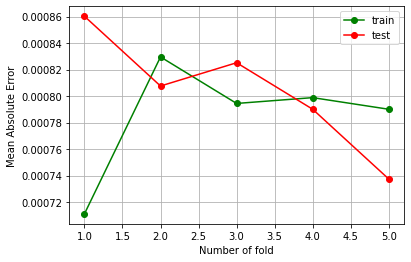

In [ ]:
# LOGISTIC REGRESSION USING CROSS VALIDATION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression()
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# LOGISTIC REGRESSION USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = LogisticRegression()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9791952435570328
precision: 0.07252149530730836
recall: 0.902870813397129
f1: 0.1342210789674687


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# LOGISTIC REGRESSION USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = LogisticRegression()
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9750434027777779
precision: 0.06944891855053291
recall: 0.8894736842105264
f1: 0.12876251758494675


In [ ]:
# # From the training dataset, separate the majority and minority classes
# original_Xtrain_majprity = original_Xtrain[original_Xtrain==1]
# original_ytrain =

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.999420666409185
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9995611109160493
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9995435473394076
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9995962149540913
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9994733238531627


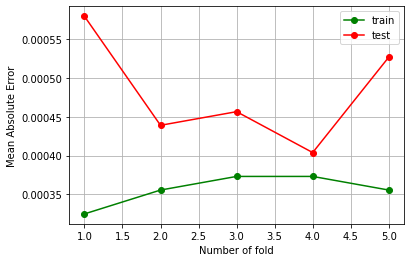

In [ ]:
# Kneighbours
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the best StratifiedKFold matrix
# Kneighbours USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = KNeighborsClassifier(n_neighbors=3)
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9984878631118186
precision: 0.5509721967933732
recall: 0.8555707450444293
f1: 0.6688472256092605


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the best StratifiedKFold matrix
# Kneighbours USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = KNeighborsClassifier(n_neighbors=3)
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9984917534722222
precision: 0.5918113289721156
recall: 0.8789473684210526
f1: 0.7068367998021097


Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9990871107053826
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9991046662687406
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9992099857797441
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9991748740366215
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9991397622934991


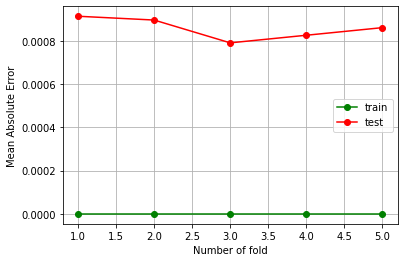

In [ ]:
# Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier()
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the best StratifiedKFold matrix
# Decision Tree USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = DecisionTreeClassifier()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.997635823131481
precision: 0.41551365290193487
recall: 0.8005468215994533
f1: 0.5465730051956256


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the best StratifiedKFold matrix
# Decision Tree USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = DecisionTreeClassifier()
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9974066840277779
precision: 0.43209759682941407
recall: 0.7894736842105263
f1: 0.5571098854659059


Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9770022120009831
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9785822127032057
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9770369199978933
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9785116132090378
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9782482751356191


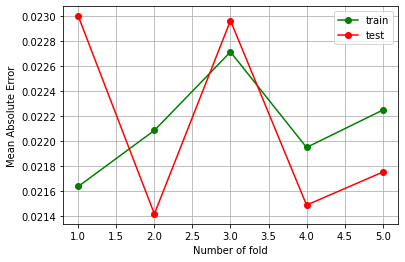

In [ ]:
# Naive bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = GaussianNB()
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Naive bayes USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = GaussianNB()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9764939959270617
precision: 0.0624494715750198
recall: 0.8686944634313056
f1: 0.11651075042698986


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Naive bayes USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = GaussianNB()
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(),enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9761393229166666
precision: 0.0698431570475794
recall: 0.8578947368421053
f1: 0.12914511836904805


Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.999420666409185
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9995259997893332
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9995435473394076
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9995962149540913
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9995084355962852


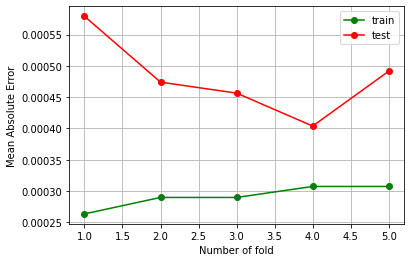

In [ ]:
# XGBOOST
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import xgboost as xgb

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# XGBOOST USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import xgboost as xgb
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9939654970623346
precision: 0.2150328853595899
recall: 0.884483937115516
f1: 0.3451977094189001


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# XGBOOST USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import xgboost as xgb
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9956705729166666
precision: 0.31012177079776937
recall: 0.8736842105263157
f1: 0.45634946119271935


Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9992099996488887
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.999385555282469
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9992977651375503
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9994557679816014
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9993855444953564


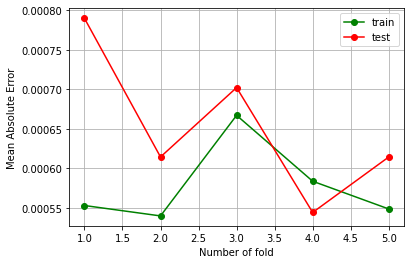

In [ ]:
# AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = AdaBoostClassifier(n_estimators=100, random_state=9)
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# AdaBoost USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = AdaBoostClassifier(n_estimators=100, random_state=9)
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9886144987242809
precision: 0.12462701368648221
recall: 0.879289131920711
f1: 0.21790149227356168


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# AdaBoost USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = AdaBoostClassifier(n_estimators=100, random_state=9)
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9992802219023208
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9995435553526912
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9994031003669177
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9995259914678464
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.999420656238479


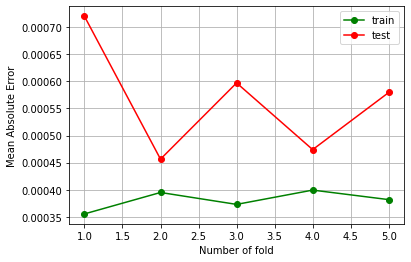

In [ ]:
# Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = SVC()
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Support Vector Machine USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = SVC()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9988413328183702
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9994733330992591
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9992977651375503
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9994733238531627
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9993328768806727


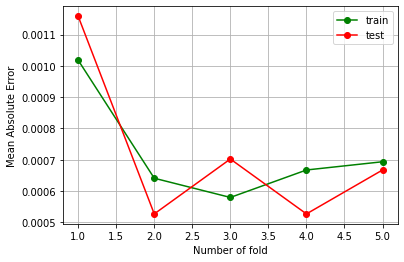

In [ ]:
# Linear Support Vector Classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = LinearSVC()
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Linear Support Vector Classification USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = LinearSVC()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9804498958357716
precision: 0.07670362315957542
recall: 0.8950786056049214
f1: 0.14119483506136143


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Linear Support Vector Classification USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = LinearSVC()
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     23 ... 284796 284799 284802]
Fold 1 Accuracy: 0.9994908886626171
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      7 ... 284786 284792 284804]
Fold 2 Accuracy: 0.9995786664794073
Train: [     0      1      2 ... 284802 284804 284805] Test: [     3      6      8 ... 284800 284803 284806]
Fold 3 Accuracy: 0.9995084355962852
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     19     25 ... 284791 284794 284798]
Fold 4 Accuracy: 0.9995962149540913
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      4      9 ... 284795 284801 284805]
Fold 5 Accuracy: 0.9995611032109689


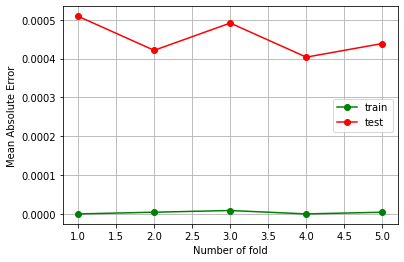

In [ ]:
# Ranfom Forest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
# print(sss)


fold_no = 1
mae_train = []
mae_test = []
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(n_estimators=100, max_features=3)
    model.fit(original_Xtrain,original_ytrain)
    y_train_predictions = model.predict(original_Xtrain)
    y_test_predictions = model.predict(original_Xtest)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(original_ytest,y_test_predictions))
    mae_train.append(mean_absolute_error(original_ytrain, y_train_predictions))
    mae_test.append(mean_absolute_error(original_ytest, y_test_predictions))
    fold_no+=1
folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Random Forest USING CROSS VALIDATION and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = RandomForestClassifier(n_estimators=100, max_features=3)
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))


done right mean of scores 5-fold:
accuracy: 0.9995084384728822
precision: 0.8977642540673102
recall: 0.8189336978810662
f1: 0.8551728211687667


In [ ]:
# ALSO, YOU NEED TO REMOVE THE train_test_split and add the nestStratifiedKFold matrix
# Random Forest USING CROSS VALIDATION and SMOTE ENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import EditedNearestNeighbours

X = df.drop('Class', axis=1)
y = df['Class']

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

# cross validation done right
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #9,15,35,(10,35)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
model = RandomForestClassifier(n_estimators=100, max_features=3)
enn = EditedNearestNeighbours()
for train, test in sss.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    prediction = model.predict(X_train.iloc[test])

    accuracy.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision.append(precision_score(y_train.iloc[test], prediction))
    recall.append(recall_score(y_train.iloc[test], prediction))
    f1.append(f1_score(y_train.iloc[test], prediction))
    auc.append(roc_auc_score(y_train.iloc[test], prediction))
print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

In [ ]:
# # SMOTE FROM SCRATCH
# import numpy as np
# import pandas as pd
# import random

# X = df.drop('Class', axis=1)
# y = df['Class']


In [ ]:
# from sklearn.neighbors import NearestNeighbors
# def nearest_neighbour(X):
#   nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
#   euclidean,indices= nbs.kneighbors(X)
#   return indices

# def SMOTE_100(X):
#   indices2 = nearest_neighbour(X)
#   matrix=[]
#   #store the values of t into an object and randomly select a value from the object and save it to a new list that will later be added to x1 training data
#   for m in range(len(indices2)):
#     t=x1[indices2[m]]
#     newt=pd.DataFrame(t)
#     matrix.append([])
#     for j in range(len(newt.columns)):
#       matrix[m].append(random.choice(newt[j]))
#   return matrix

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.datasets import load_digits
# from sklearn.linear_model import LogisticRegression
# digits = load_digits()

# scores = []
# model = LogisticRegression()
# folds = StratifiedKFold(n_splits=3)

In [ ]:
# for train_index,test_index in folds.split(digits.data,digits.target):
#   X_train,X_test,y_train,y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
#   model.fit(X_train,y_train)
#   print(model.score(X_test,y_test))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9215358931552587


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9415692821368948
0.9165275459098498


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
